In [6]:
azul1, azul2, azul3, azul4, azul5, azul6 = '#174A7E', '#4A81BF', "#6495ED", '#2596BE', '#94AFC5', '#CDDBF3'
cinza1, cinza2, cinza3, cinza4, cinza5, branco = '#231F20', '#414040', '#555655', '#A6A6A5', '#BFBEBE', '#FFFFFF'
vermelho1, vermelho2, laranja1 = '#C3514E',	'#E6BAB7',	'#F79747'
verde1, verde2, verde3 = '#0C8040',	'#9ABB59', '#9ECCB3'

# Atividade 1

Como estão dispostos os valores agregados de serviços por região do Brasil no ano de 2018?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_pib = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos-composicao-relacionamento/master/dados/pib_br_2002_2020_estados.csv")
df_pib.head()

,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,RO,Norte,7467629886,839731192,6627898698,715526872,1191090432,2484579193,2236702207
1,2003,RO,Norte,9425010486,1108434936,8316575548,1278658831,1216605061,3376727040,2444584625
2,2004,RO,Norte,11004641436,1288806654,9715834778,1288515348,1674933817,3986529419,2765856199
3,2005,RO,Norte,12511821181,1476144194,11035676990,1342222120,1887932121,4603783904,3201738843
4,2006,RO,Norte,13054713344,1613809974,11440903374,1238006193,2210692147,4320526746,3671678293


In [ ]:
df_2018 = df_pib.copy()
df_2018 = df_2018.query('ano == 2018')[['regiao', 'va_servicos']]

df_2018 = df_2018.groupby('regiao').sum().sort_values('va_servicos', ascending = False)

df_2018.head()

,va_servicos
regiao,
Sudeste,1933221862566
Sul,546627330178
Nordeste,433449662991
Centro-Oeste,296250896281
Norte,133394247965


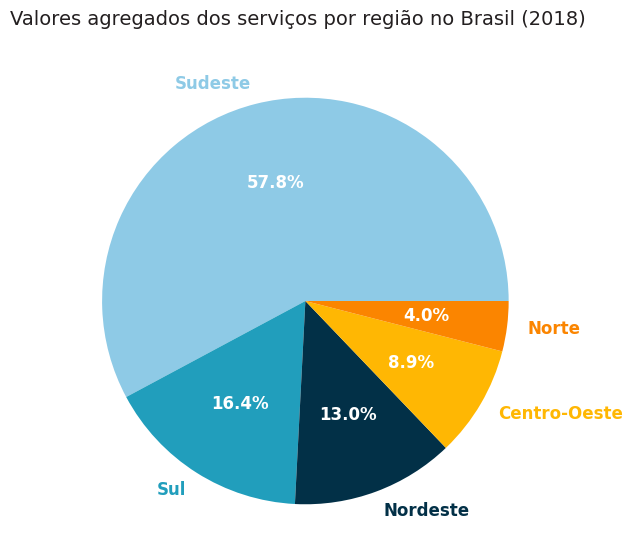

In [ ]:
fig, ax = plt.subplots(figsize = (6,6))
cores = ['#8ecae6', '#219ebc', '#023047', '#ffb703', '#fb8500']

plt.suptitle('Valores agregados dos serviços por região no Brasil (2018)', fontsize = 14, color = cinza1)
ptc, text, _ = ax.pie(data = df_2018, x = 'va_servicos', labels = df_2018.index, autopct = '%.1f%%',colors = cores, radius= 1.1, textprops= {'size':12, 'fontweight': 'bold', 'color': branco})

for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

plt.show()

Qual a participação da Região Norte nos valores agregados da indústria de todo Brasil nos anos de 2010 e 2020? Podemos notar algum comportamento?

In [ ]:
df_2010 = df_pib.copy()
df_2010 = df_2010.query('ano == 2010')[['regiao', 'va_servicos']]
df_2010.loc[df_2010['regiao'] == 'Norte']
df_2010.loc[df_2010['regiao'] != 'Norte', 'regiao'] = 'Outros'
df_2010 = df_2010.groupby('regiao').sum()
df_2010



,va_servicos
regiao,
Norte,66395297926
Outros,1634509702097


In [ ]:
df_2020 = df_pib.copy()
df_2020 = df_2020.query('ano == 2020')[['regiao', 'va_servicos']]
df_2020.loc[df_2020['regiao'] == 'Norte']
df_2020.loc[df_2020['regiao'] != 'Norte', 'regiao'] = 'Outros'
df_2020 = df_2020.groupby('regiao').sum()
df_2020

,va_servicos
regiao,
Norte,144262069037
Outros,3384816930989


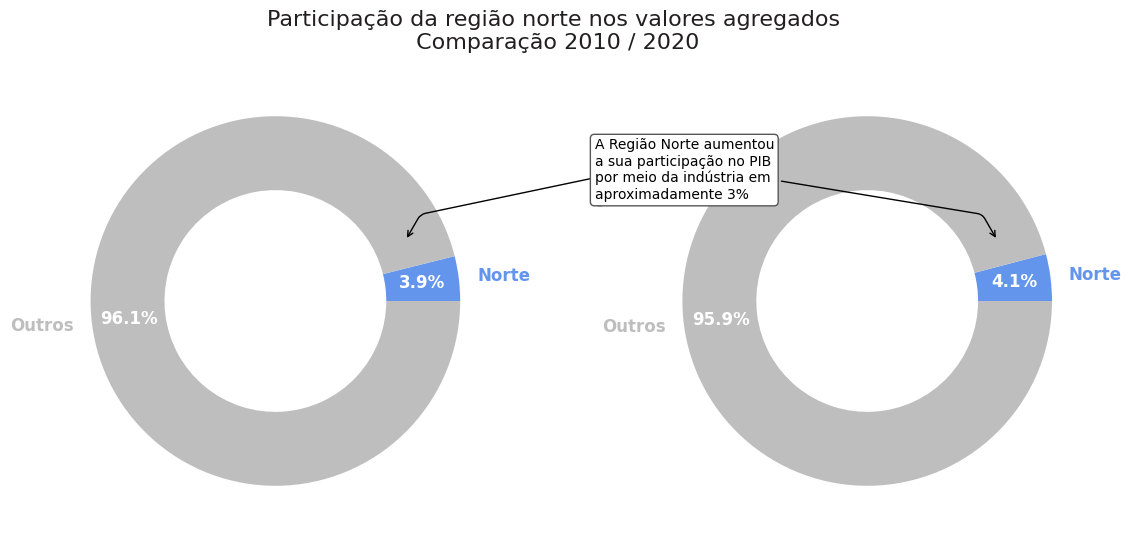

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (14, 6))
cores = [azul3, cinza5]

plt.suptitle('Participação da região norte nos valores agregados\n Comparação 2010 / 2020', fontsize = 16, color = cinza1)

ptc, text, _ = axs[0].pie(data = df_2010, x = 'va_servicos', labels = df_2010.index, autopct = '%.1f%%', startangle = 0, pctdistance = 0.8, wedgeprops = dict(width = 0.4),
                          textprops = dict(size = 12, fontweight = 'bold', color = branco), colors = cores)
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

ptc, text, _ = axs[1].pie(data = df_2020, x = 'va_servicos', labels = df_2020.index, autopct = '%.1f%%', startangle = 0, pctdistance = 0.8, wedgeprops = dict(width = 0.4),
                          textprops = dict(size = 12, fontweight = 'bold', color = branco), colors = cores)
for i, p in enumerate(ptc):
  text[i].set_color(p.get_facecolor())

axs[0].annotate('\n\n\n', xy=(260, 210), xycoords='axes points', xytext=(400, 240), textcoords='axes points', bbox=dict(boxstyle="round", fc=branco, ec=cinza3), size=10, arrowprops=dict(arrowstyle="->", fc=cinza1, connectionstyle="arc,angleA=0,angleB=60,armA=30,armB=30,rad=5"))

axs[1].annotate('A Região Norte aumentou\na sua participação no PIB\npor meio da indústria em\naproximadamente 3%', xy=(260, 210), xycoords='axes points', xytext=(-30, 240), textcoords='axes points', bbox=dict(boxstyle="round", fc=branco, ec=cinza3), size=10, arrowprops=dict(arrowstyle="->", fc=cinza1, connectionstyle="arc,angleA=0,angleB=-60,armA=30,armB=-30,rad=5"))

plt.show()

# Atividade 2

Como está composto o PIB do Estado de São Paulo em 2020 partindo do valor agregado bruto dos bens e serviços produzidos e os impostos líquidos?

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

In [ ]:
sp = df_pib.query('sigla_uf == "SP" and ano == 2020')[['va', 'impostos_liquidos','pib']]
sp = sp.melt(var_name = 'indicadores', value_name= 'valores')
sp

,indicadores,valores
0,va,2014850308310
1,impostos_liquidos,362788671543
2,pib,2377638979835


In [ ]:
sp.loc[sp['indicadores'] == 'impostos_liquidos', 'valores'] = sp['valores'] - 1
sp['valores_str'] = (sp['valores']/1e12).map('R$ {:,.3f} Tri'.format)
sp['medidas'] = ['absolute', 'relative', 'total']
sp

,indicadores,valores,valores_str,medidas
0,va,2014850308310,R$ 2.015 Tri,absolute
1,impostos_liquidos,362788671542,R$ 0.363 Tri,relative
2,pib,2377638979835,R$ 2.378 Tri,total


In [ ]:
fig = go.Figure(go.Waterfall(name = '', measure = sp['medidas'],
                             x = sp['indicadores'], y = sp['valores'],
                             text = sp['valores_str'], textposition = 'outside',
                             connector_line = dict(color = cinza3), totals_marker = dict(color = azul3), decreasing_marker = dict(color = vermelho1)))

fig.update_layout(width = 1000, height = 500, font_size = 15,
                  font_color = cinza2, title_font_color = cinza1, title_font_size = 24,
                  title_text = 'Distribuição do produto interno de São Paulo em 2020' +
                  '<br><sup size = 1 style = "color:#555655> Impostos liquídos em valores ' +
                  'adicionados brutos de bens e serviços (em trilhões de reais)</sup>',
                  title_pad_l = 50, plot_bgcolor = branco, yaxis_range = [0, 2.6e12], hovermode = 'closest')

fig.update_yaxes(showticklabels=False)

fig.update_traces(hovertemplate = "<b>%{x}</b> = %{text}")

fig.show()

Qual a evolução anual do valor agregado de serviços na Região Nordeste entre os anos de 2016 a 2020?

In [ ]:
anos = [x for x in range(2016, 2021)]
nordeste = df_pib.query('regiao == "Nordeste" and ano == @anos')[['ano', 'va_servicos']]
nordeste = nordeste.groupby('ano').sum().reset_index()
nordeste.head()

,ano,va_servicos
0,2016,391149062027
1,2017,413890511671
2,2018,433449662991
3,2019,450661680677
4,2020,436102799877


In [ ]:
nordeste['variacao_servicos'] = nordeste['va_servicos'].diff().fillna(nordeste['va_servicos']).astype('int64')
nordeste['medidas'] = ['absolute'] + ['relative'] * 4
nordeste.head()

,ano,va_servicos,variacao_servicos,medidas
0,2016,391149062027,391149062027,absolute
1,2017,413890511671,22741449644,relative
2,2018,433449662991,19559151320,relative
3,2019,450661680677,17212017686,relative
4,2020,436102799877,-14558880800,relative


In [ ]:
atualizacao = pd.Series({'ano': 'total',
                         'va_servicos': nordeste['va_servicos'].values[-1],
                         'variacao_servicos': nordeste['va_servicos'].values[-1],
                         'medidas': 'total'}).to_frame().T

nordeste = pd.concat([nordeste, atualizacao], axis = 0, ignore_index = True)
nordeste = nordeste.drop(columns = ['va_servicos'])

nordeste['variacao_pib_texto'] = (nordeste['variacao_servicos']/1e9).map('R$ {:,.2f} Bi'.format)
nordeste

,ano,variacao_servicos,medidas,variacao_pib_texto
0,2016,391149062027,absolute,R$ 391.15 Bi
1,2017,22741449644,relative,R$ 22.74 Bi
2,2018,19559151320,relative,R$ 19.56 Bi
3,2019,17212017686,relative,R$ 17.21 Bi
4,2020,-14558880800,relative,R$ -14.56 Bi
5,total,436102799877,total,R$ 436.10 Bi


In [ ]:
fig = go.Figure(go.Waterfall(name = '', measure = nordeste['medidas'], y = nordeste['variacao_servicos'],
                             text = nordeste['variacao_pib_texto'], textposition = 'outside',
                             connector_line = dict(color = cinza3), totals_marker = dict(color = azul3),
                             increasing_marker = dict(color = verde1), decreasing_marker = dict(color = vermelho1)))

fig.update_layout(width = 1000, height = 500, font_size = 12, font_color = cinza2, title_font_color = cinza1, title_font_size = 18,
                  title_text = 'Variação do valor agregado de serviços do nordeste' +
                  f'<br><sup size=1 style = {cinza3}> de 2016 a 2020 (em bilhões de reais)</sup>',
                  plot_bgcolor = branco, yaxis_range = [0, 500e9])


fig.update_yaxes(showticklabels=False)


fig.update_xaxes(tickmode='array', tickvals=np.arange(0,6), ticktext=nordeste["ano"])


fig.update_traces(hovertemplate = "<b>%{x}</b> = %{text}")

fig.add_annotation(text="No período destacado, <b>apenas</b><br>no ano de 2020 houve recuo do<br>valor agregado do <b>setor de<br>serviços</b> na região Nordeste",
                   align="left", axref = 'x', ayref='y', x=4, y=390e9, ax=3, ay=250e9,
                   arrowhead=1, arrowside = "start", showarrow=True, arrowwidth=2, arrowcolor=cinza3,
                   bordercolor= cinza3, borderwidth=1, borderpad=4)

fig.show()

# Atividade 3

Como está composto, em valores absolutos, o PIB por região dos 4 últimos anos do conjunto de dados (2017 a 2020)?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_pib = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos-composicao-relacionamento/master/dados/pib_br_2002_2020_estados.csv")
df_pib.head()

,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,RO,Norte,7467629886,839731192,6627898698,715526872,1191090432,2484579193,2236702207
1,2003,RO,Norte,9425010486,1108434936,8316575548,1278658831,1216605061,3376727040,2444584625
2,2004,RO,Norte,11004641436,1288806654,9715834778,1288515348,1674933817,3986529419,2765856199
3,2005,RO,Norte,12511821181,1476144194,11035676990,1342222120,1887932121,4603783904,3201738843
4,2006,RO,Norte,13054713344,1613809974,11440903374,1238006193,2210692147,4320526746,3671678293


In [ ]:
anos = [x for x in range(2017, 2021)]
df_reg = df_pib.query('ano == @anos')[['ano', 'regiao', 'pib']]
df_reg['pib'] = (df_reg['pib'] / 1e12).round(2)
df_reg

,ano,regiao,pib
15,2017,Norte,0.04
16,2018,Norte,0.04
17,2019,Norte,0.05
18,2020,Norte,0.05
34,2017,Norte,0.01
...,...,...,...
493,2020,Centro-Oeste,0.22
509,2017,Centro-Oeste,0.24
510,2018,Centro-Oeste,0.25
511,2019,Centro-Oeste,0.27


In [ ]:
df_reg = pd.crosstab(index = df_reg.ano, columns = df_reg.regiao, values = df_reg.pib, aggfunc = 'sum')
df_reg = df_reg[['Sudeste', 'Sul', 'Nordeste', 'Centro-Oeste', 'Norte']]
df_reg = df_reg.reset_index()
df_reg

regiao,ano,Sudeste,Sul,Nordeste,Centro-Oeste,Norte
0,2017,3.48,1.12,0.95,0.66,0.36
1,2018,3.72,1.20,1.01,0.70,0.39
2,2019,3.92,1.27,1.04,0.73,0.43
3,2020,3.95,1.31,1.09,0.79,0.49


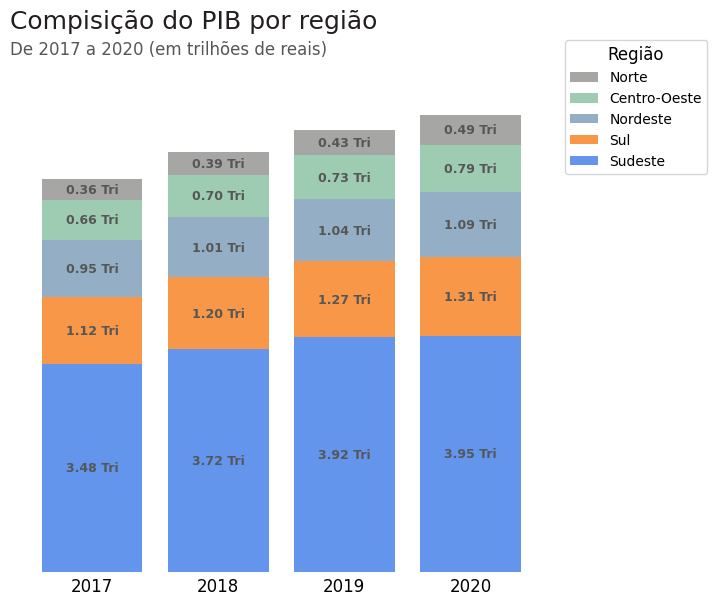

In [ ]:
fig, ax = plt.subplots(figsize = (7,7))

cores = [azul3, laranja1, azul5, verde3, cinza4]

ax.set_title('Compisição do PIB por região', fontsize = 18, color = cinza1, ha = 'left', x = 0, transform = ax.transAxes)
ax.text(0, 0.97, 'De 2017 a 2020 (em trilhões de reais)', color = cinza3, fontsize = 12, ha = 'left', va = 'center', transform = ax.transAxes)

df_reg.plot(x ='ano', kind = 'bar', width = 0.8, stacked = True, color = cores, ax = ax)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_yticklabels([])
ax.xaxis.set_tick_params(labelsize = 12, color = cinza2, labelrotation = 0)
ax.set_ylim(0,9)
ax.set_frame_on(False)

ax.legend(bbox_to_anchor = (1.01, 1), reverse = True, title = 'Região', title_fontsize = 12, fontsize = 10)

ax.tick_params(axis = 'both', which = 'both', length = 0)

for container in ax.containers:
  labels = [f'{valor.get_height():.2f} Tri' for valor in container]
  ax.bar_label(container, label_type = 'center', labels = labels, size = 9, color = cinza3, fontweight = 'bold')

plt.show()

Como está composto os valores agregados brutos dos bens e serviços (em valor absoluto) em relação aos Estados da região Centro-Oeste no ano de 2020?

In [ ]:
df_n_estados = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/dataviz-graficos-composicao-relacionamento/main/dados/pib_br_2002_2020_estados.csv")
df_n_estados = df_n_estados.query('regiao == "Centro-Oeste" and ano == 2020')[['sigla_uf', 'va_servicos', 'va_industria', 'va_adespss', 'va_agropecuaria']]
df_n_estados = df_n_estados.set_index('sigla_uf')
df_n_Estados = df_n_estados.sort_values(by ='va_servicos', axis = 0)
df_n_estados

,va_servicos,va_industria,va_adespss,va_agropecuaria
sigla_uf,,,,
MS,40463334838,23313710730,20075400418,26045011196
MT,62253821963,27663774472,23686938663,46004316712
GO,89797907217,47124851599,33887411346,29022562983
DF,116547655370,10942472569,111267001381,1623976909


In [ ]:
# texto colorido
from matplotlib import transforms

def texto_colorido(x, y, texto, cores, esp = 20, ax =None, **kw):
  cores = list(reversed(cores))
  t = ax.transData
  canvas = ax.figure.canvas

  for i, linha in enumerate(reversed(texto.split('\n'))):
    frases = linha.split('||')
    for s, cor in zip(frases, cores[i]):
      texto = ax.text(x, y, s, color = cor, transform = t, **kw)
      texto.draw(canvas.get_renderer())
      ex = texto.get_window_extent()
      t = transforms.offset_copy(texto._transform, x= ex.width, units = 'dots')

    t = transforms.offset_copy(ax.transData, x = 0, y = (i + 1) * esp, units = 'dots')

In [ ]:
def grafico_va():
  fig, ax = plt.subplots(figsize = (12,7))
  cores = [azul3, laranja1, cinza5, verde3]

  df_n_estados.plot(kind = 'barh', stacked = True, color = cores, ax = ax)

  plt.suptitle('Valores adicionados de bens e serviços da região Centro-Oeste do Brasil em 2020', size = 14,
              color = cinza1, ha = 'left', x = 0, y = 1.1, transform = ax.transAxes)
  plt.title('Em bilhões de reais', fontsize = 12, color = cinza3, ha = 'left', x = 0, y = 1.03, transform=ax.transAxes)
  ax.legend(bbox_to_anchor = (1,1), bbox_transform = ax.transAxes, fontsize = 10, loc = 'upper left')
  ax.set_ylabel('')
  ax.set_xticklabels([])
  ax.yaxis.set_tick_params(labelsize = 10, color = cinza2)
  ax.set_frame_on(False)

  ax.tick_params(axis = 'both', which = 'both', length = 0)

  for container in ax.containers:
    labels = [f'{valor.get_width()/1e9:.0f} Bi' for valor in container]
    ax.bar_label(container, label_type = 'center', labels = labels, size = 9, color = cinza2, fontweight = 'bold')

  return ax,cores



<>:9: SyntaxWarning:

invalid escape sequence '\ '

<>:10: SyntaxWarning:

invalid escape sequence '\ '

<>:11: SyntaxWarning:

invalid escape sequence '\ '

<>:13: SyntaxWarning:

invalid escape sequence '\ '

<>:16: SyntaxWarning:

invalid escape sequence '\ '

<>:17: SyntaxWarning:

invalid escape sequence '\ '

<>:9: SyntaxWarning:

invalid escape sequence '\ '

<>:10: SyntaxWarning:

invalid escape sequence '\ '

<>:11: SyntaxWarning:

invalid escape sequence '\ '

<>:13: SyntaxWarning:

invalid escape sequence '\ '

<>:16: SyntaxWarning:

invalid escape sequence '\ '

<>:17: SyntaxWarning:

invalid escape sequence '\ '

/tmp/ipython-input-964160186.py:9: SyntaxWarning:

invalid escape sequence '\ '

/tmp/ipython-input-964160186.py:10: SyntaxWarning:

invalid escape sequence '\ '

/tmp/ipython-input-964160186.py:11: SyntaxWarning:

invalid escape sequence '\ '

/tmp/ipython-input-964160186.py:13: SyntaxWarning:

invalid escape sequence '\ '

/tmp/ipython-input-964160186.py:16: Syn

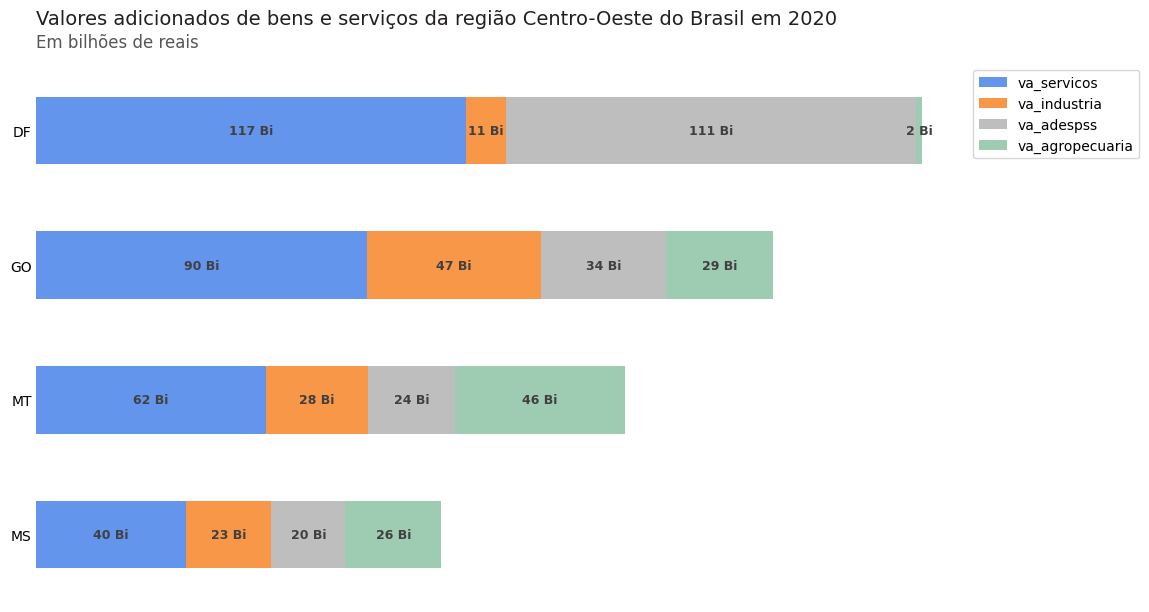

In [ ]:
ax.cores = grafico_va()

ax.legend().remove()
texto_colorido(0, 3.3, '$\\bf{Serviços}$ || | || $\\bf{Indústria}$ || | || $\\bf{ADESPSS}$ || | || $\\bf{Agropecuária}$',
               cores = [[cores[0], cinza3, cores[1], cinza3, cores[2], cinza3, cores[3]]], ax=ax, fontsize=12)

texto_colorido(
    250e9, 2,                                                             # coordenadas
    'Em 2020, o ||$\\bf{Distrito\ Federal}$|| liderou em dois setores no Centro-Oeste:\n'
    '$\\bf{serviços}$|| e ||$\\bf{ADESPSS\ (Administração,\ Defesa,\ Educação,}$\n'
    '$\\bf{Saúde\ Pública\ e\ Seguridade\ Social)}$.\n'
    '\n'
    '$\\bf{Goiás}$|| foi o estado com maior participação em ||$\\bf{indústria}$|| e ||$\\bf{Mato\ Grosso}$\n'
    'em ||$\\bf{agropecuária}$||.\n'
    '\n'
    'Já ||$\\bf{Mato\ Grosso\ do\ Sul}$||, em números gerais, ultrapassa apenas o\n'
    '$\\bf{Distrito\ Federal}$|| em dois setores: ||$\\bf{indústria}$|| e ||$\\bf{agropecuária}$ ||.',
    [[cinza3, cinza1, cinza3],                     # linha 1                          # cores
     [azul3, cinza3, cinza5],                      # linha 2
     [cinza5],                                     # linha 3
     [cinza3],                                     # linha 4
     [cinza1, cinza3, laranja1, cinza3, cinza1],   # linha 5
     [cinza3, verde3, cinza3],                     # linha 6
     [cinza3],                                     # linha 7
     [cinza3, cinza1, cinza3],     # linha 8
     [cinza1, cinza3, laranja1, cinza3, verde3, cinza3],   # linha 9
    ],
    esp=22,         # espaçamento
    ax=ax,          # figura onde desenhar o texto
    fontsize=12)

fig.show()

<>:14: SyntaxWarning:

invalid escape sequence '\ '

<>:15: SyntaxWarning:

invalid escape sequence '\ '

<>:16: SyntaxWarning:

invalid escape sequence '\ '

<>:18: SyntaxWarning:

invalid escape sequence '\ '

<>:21: SyntaxWarning:

invalid escape sequence '\ '

<>:22: SyntaxWarning:

invalid escape sequence '\ '

<>:14: SyntaxWarning:

invalid escape sequence '\ '

<>:15: SyntaxWarning:

invalid escape sequence '\ '

<>:16: SyntaxWarning:

invalid escape sequence '\ '

<>:18: SyntaxWarning:

invalid escape sequence '\ '

<>:21: SyntaxWarning:

invalid escape sequence '\ '

<>:22: SyntaxWarning:

invalid escape sequence '\ '

/tmp/ipython-input-3406079316.py:14: SyntaxWarning:

invalid escape sequence '\ '

/tmp/ipython-input-3406079316.py:15: SyntaxWarning:

invalid escape sequence '\ '

/tmp/ipython-input-3406079316.py:16: SyntaxWarning:

invalid escape sequence '\ '

/tmp/ipython-input-3406079316.py:18: SyntaxWarning:

invalid escape sequence '\ '

/tmp/ipython-input-3406079316.py

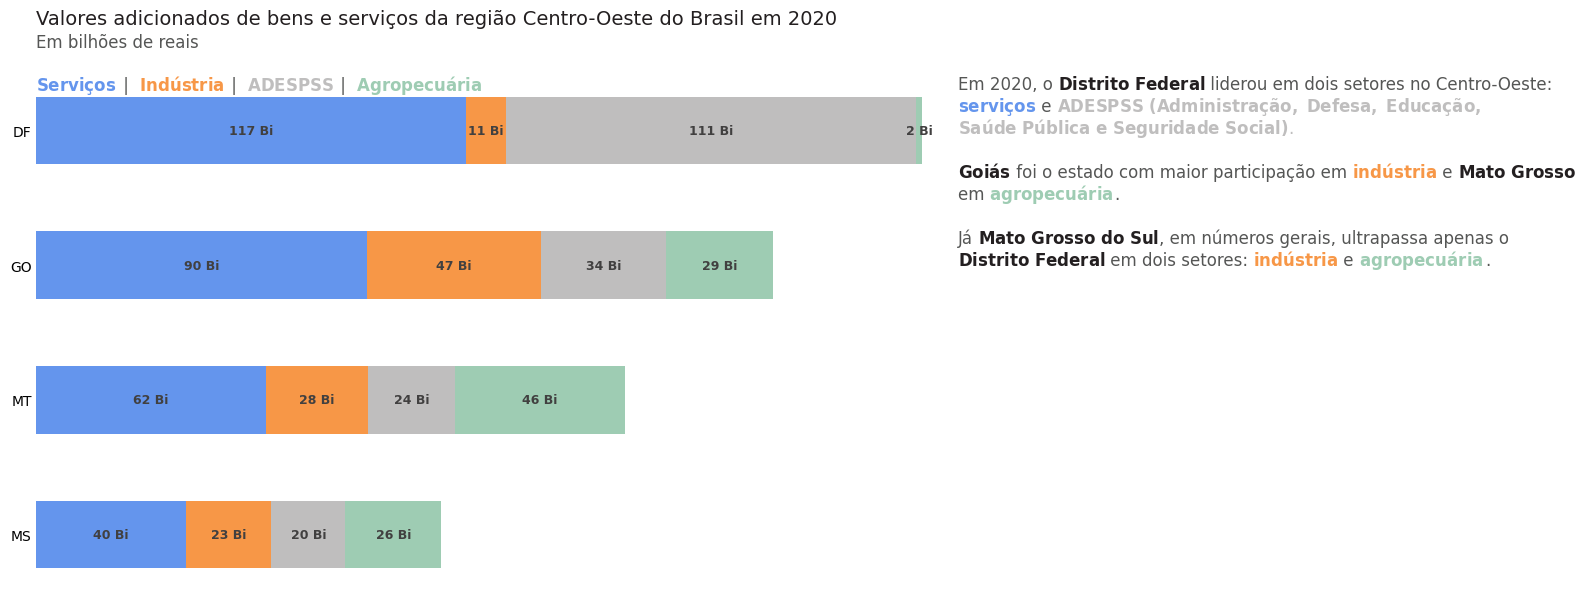

In [ ]:
# Gerando o gráfico de barras empilhadas e salvando as cores que vamos utilizar no texto
ax, cores = grafico_va()

## Trabalhando com o texto colorido para legenda e anotações

# legenda das barras
ax.legend().remove()    # remover legenda padrão da visualização
texto_colorido(0, 3.3, '$\\bf{Serviços}$ || | || $\\bf{Indústria}$ || | || $\\bf{ADESPSS}$ || | || $\\bf{Agropecuária}$',
               cores = [[cores[0], cinza3, cores[1], cinza3, cores[2], cinza3, cores[3]]], ax=ax, fontsize=12)

# Anotando uma conclusão no gráfico
texto_colorido(
    250e9, 2,                                                             # coordenadas
    'Em 2020, o ||$\\bf{Distrito\ Federal}$|| liderou em dois setores no Centro-Oeste:\n'
    '$\\bf{serviços}$|| e ||$\\bf{ADESPSS\ (Administração,\ Defesa,\ Educação,}$\n'
    '$\\bf{Saúde\ Pública\ e\ Seguridade\ Social)}$.\n'
    '\n'
    '$\\bf{Goiás}$|| foi o estado com maior participação em ||$\\bf{indústria}$|| e ||$\\bf{Mato\ Grosso}$\n'
    'em ||$\\bf{agropecuária}$||.\n'
    '\n'
    'Já ||$\\bf{Mato\ Grosso\ do\ Sul}$||, em números gerais, ultrapassa apenas o\n'
    '$\\bf{Distrito\ Federal}$|| em dois setores: ||$\\bf{indústria}$|| e ||$\\bf{agropecuária}$ ||.',
    [[cinza3, cinza1, cinza3],                     # linha 1                          # cores
     [azul3, cinza3, cinza5],                      # linha 2
     [cinza5],                                     # linha 3
     [cinza3],                                     # linha 4
     [cinza1, cinza3, laranja1, cinza3, cinza1],   # linha 5
     [cinza3, verde3, cinza3],                     # linha 6
     [cinza3],                                     # linha 7
     [cinza3, cinza1, cinza3],     # linha 8
     [cinza1, cinza3, laranja1, cinza3, verde3, cinza3],   # linha 9
    ],
    esp=22,         # espaçamento
    ax=ax,          # figura onde desenhar o texto
    fontsize=12)

fig.show()

# Exercício 4

No setor de Administração, Defesa, Educação, Saúde Pública e Seguridade Social (ADESPSS), como estão distribuídos os valores adicionados por região, em valores relativos, dentro do período da base dos dados (2002 - 2020)?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_ind = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos-composicao-relacionamento/master/dados/pib_br_2002_2020_estados.csv")
df_ind.head()

,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,RO,Norte,7467629886,839731192,6627898698,715526872,1191090432,2484579193,2236702207
1,2003,RO,Norte,9425010486,1108434936,8316575548,1278658831,1216605061,3376727040,2444584625
2,2004,RO,Norte,11004641436,1288806654,9715834778,1288515348,1674933817,3986529419,2765856199
3,2005,RO,Norte,12511821181,1476144194,11035676990,1342222120,1887932121,4603783904,3201738843
4,2006,RO,Norte,13054713344,1613809974,11440903374,1238006193,2210692147,4320526746,3671678293


In [ ]:
df_ind = df_ind[['regiao', 'ano', 'va_adespss']]
df_ind

,regiao,ano,va_adespss
0,Norte,2002,2236702207
1,Norte,2003,2444584625
2,Norte,2004,2765856199
3,Norte,2005,3201738843
4,Norte,2006,3671678293
...,...,...,...
508,Centro-Oeste,2016,92051447720
509,Centro-Oeste,2017,98002586380
510,Centro-Oeste,2018,101792841454
511,Centro-Oeste,2019,107219248727


In [ ]:
df_ind = pd.crosstab(index = df_ind.ano, columns = df_ind.regiao, values = df_ind.va_adespss, aggfunc = 'sum', normalize = 'index')
df_ind = (df_ind*100).round(2)
df_ind = df_ind[['Sudeste', 'Sul', 'Nordeste', 'Centro-Oeste', 'Norte']]
df_ind

regiao,Sudeste,Sul,Nordeste,Centro-Oeste,Norte
ano,,,,,
2002,45.80,12.44,19.25,15.24,7.27
2003,45.17,13.08,19.17,15.23,7.34
2004,44.67,12.82,19.03,16.03,7.45
2005,44.41,12.83,19.51,15.72,7.52
2006,43.70,12.61,19.99,16.02,7.68
2007,44.23,12.62,19.86,15.65,7.64
2008,44.19,12.43,20.00,15.75,7.63
2009,43.84,12.07,20.45,15.94,7.70
2010,42.55,12.88,20.81,15.88,7.88


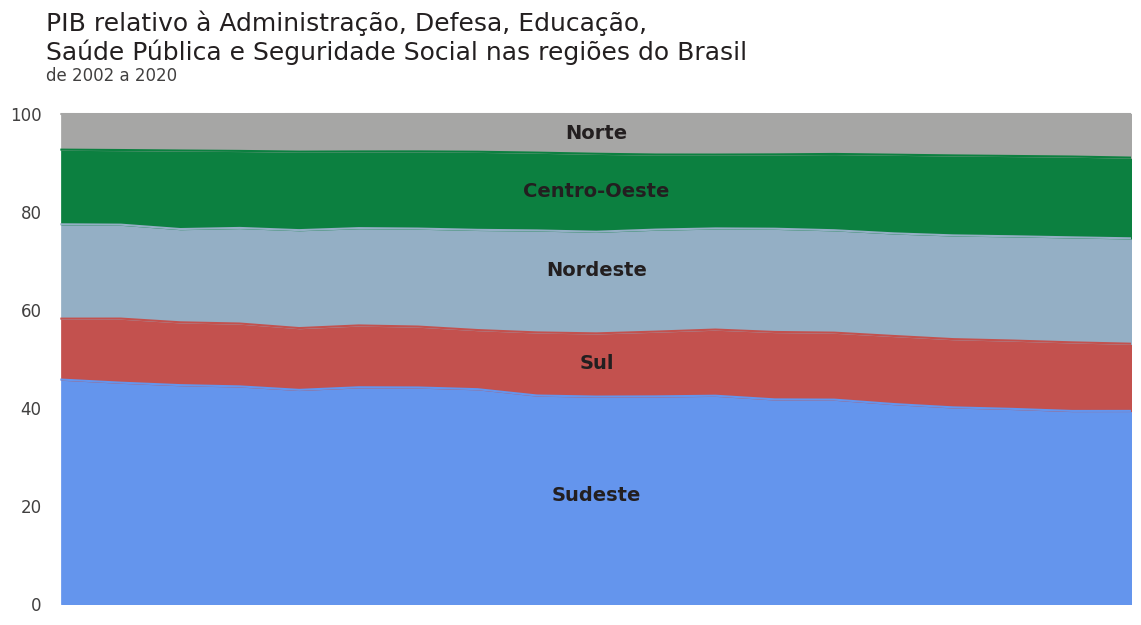

In [ ]:
fig, ax = plt.subplots(figsize = (14,7))
cores = [azul3, vermelho1, azul5, verde1, cinza4]

df_ind.plot(kind = 'area', stacked = True, color = cores, ax = ax, xticks = range(2022, 2021, 2))
ax.set_title('PIB relativo à Administração, Defesa, Educação, \nSaúde Pública e Seguridade Social nas regiões do Brasil', fontsize = 18, color = cinza1, loc = 'left', x = 0, transform = ax.transAxes)
ax.text(0, 0.98, 'de 2002 a 2020', transform = ax.transAxes, color = cinza2, fontsize = 12, ha = 'left', va = 'center')
ax.set_ylabel('')
ax.set_xlabel('')
ax.xaxis.set_tick_params(labelsize = 12, labelcolor = cinza2)
ax.yaxis.set_tick_params(labelsize = 12, labelcolor = cinza2)
plt.ylim(0, 110)
ax.set_xbound(2001.75, 2020)
ax.legend().remove()
ax.set_frame_on(False)

reg = df_ind.columns
y_pos = [21, 48, 67, 83, 95]
for i in range(len(reg)):
  ax.text(2011, y_pos[i], f'{reg[i]}', color = cinza1, weight = "bold", fontsize = 14, ha="center", transform=ax.transData)


ax.tick_params(axis='both', which='both', length=0)

plt.show()

Qual foi a variação do PIB relativo à indústria nas regiões do Brasil nos anos de 2010, 2015 e 2020?

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df_pib = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos-composicao-relacionamento/master/dados/pib_br_2002_2020_estados.csv")
df_pib.head()

,ano,sigla_uf,regiao,pib,impostos_liquidos,va,va_agropecuaria,va_industria,va_servicos,va_adespss
0,2002,RO,Norte,7467629886,839731192,6627898698,715526872,1191090432,2484579193,2236702207
1,2003,RO,Norte,9425010486,1108434936,8316575548,1278658831,1216605061,3376727040,2444584625
2,2004,RO,Norte,11004641436,1288806654,9715834778,1288515348,1674933817,3986529419,2765856199
3,2005,RO,Norte,12511821181,1476144194,11035676990,1342222120,1887932121,4603783904,3201738843
4,2006,RO,Norte,13054713344,1613809974,11440903374,1238006193,2210692147,4320526746,3671678293


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_pib = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos-composicao-relacionamento/master/dados/pib_br_2002_2020_estados.csv")

anos = [2010, 2015, 2020]
df_pib = df_pib.query('ano == @anos')[['regiao', 'ano', 'va_industria']]

df_pib = pd.crosstab(index = df_pib.ano, columns = df_pib.regiao, values = df_pib.va_industria,
                     aggfunc = 'sum', normalize = 'index')
df_pib = (df_pib * 100).round(1)
df_pib = df_pib[['Sudeste', 'Sul', 'Nordeste', 'Centro-Oeste', "Norte"]]
df_pib.head()

regiao,Sudeste,Sul,Nordeste,Centro-Oeste,Norte
ano,,,,,
2010,58.8,17.1,11.6,6.1,6.5
2015,55.0,19.0,12.9,7.0,6.1
2020,52.0,19.2,12.2,7.3,9.3


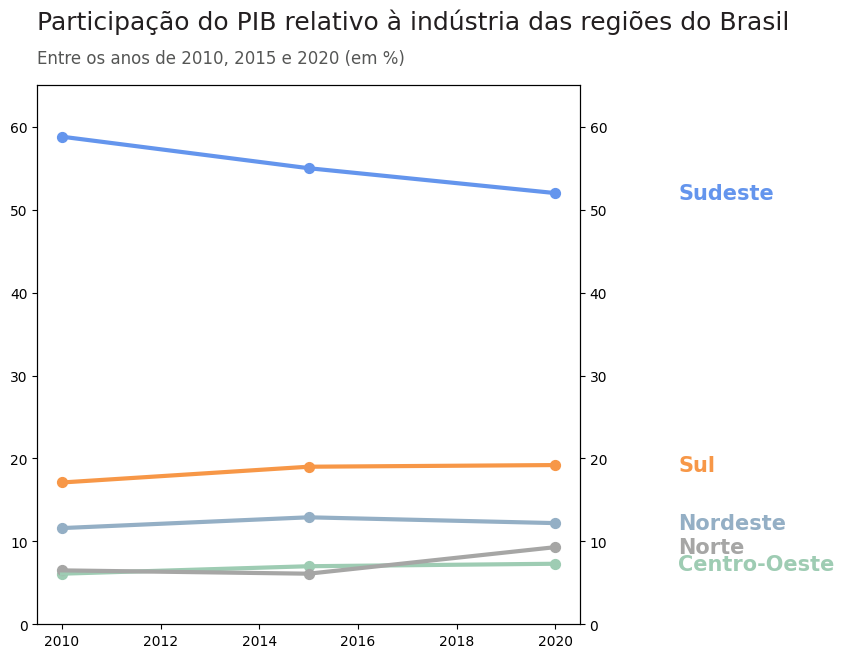

In [ ]:
def grafico_slope_pib():
  import matplotlib.pyplot as plt
  fig, ax1 = plt.subplots(figsize = (7,7))

  cores = [azul3, laranja1, azul5, verde3, cinza4]

  ax2 = ax1.twinx()
  ax1.set_ylim([0,65])
  ax2.set_ylim([0,65])

  for i in range(5):
    ax1.scatter(x = df_pib.index, y = df_pib.iloc[:,i], color = cores[i], s = 50)
    ax1.plot(df_pib.index, df_pib.iloc[:,i], color = cores[i], lw = 3)
    ax1.text(x = 2022.5, y = df_pib.iloc[-1,i], s = df_pib.columns[i],
            fontsize = 15, fontweight = 'bold', color = cores[i], va = 'center')

  ax1.set_title('Participação do PIB relativo à indústria das regiões do Brasil', fontsize = 18, color = cinza1, loc = 'left', pad = 40)
  ax1.text(0, 1.05, "Entre os anos de 2010, 2015 e 2020 (em %)", transform = ax1.transAxes, color = cinza3, fontsize = 12, ha = 'left', va = 'center')

  return ax1, ax2, cores

ax1, ax2, cores = grafico_slope_pib()

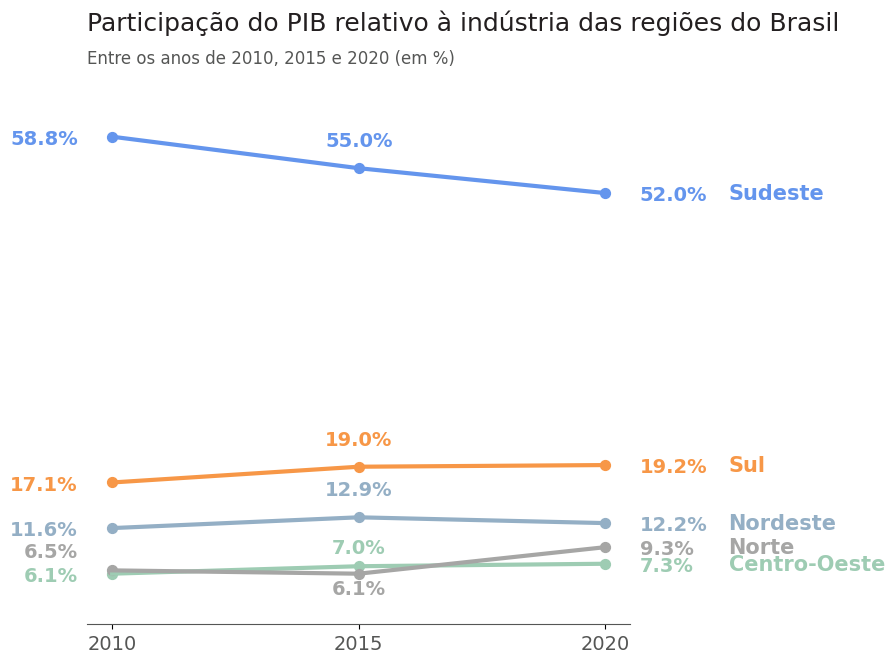

In [ ]:
ax1, ax2, cores = grafico_slope_pib()

ax1.tick_params(left = False)
ax1.spines[['top', 'left', 'right']].set_visible(False)
ax2.tick_params(right = False)
ax2.set_frame_on(False)

plt.setp(ax1, xticks = [2010,2015,2020], xticklabels = ['2010', '2015', '2020'], yticks = df_pib.iloc[0,:],
         yticklabels = [f'{str(valor)}%' if i!=4 else f'{str(valor)}%\n\n' for i, valor in enumerate(df_pib.iloc[0,:])])

valores = df_pib.iloc[1,:].values
y_pos = [53, 17, 11, 4, -1]
for i in range(len(valores)):
  ax1.text(2015, y_pos[i], f'{valores[i]}%', weight = 'bold', fontsize = 14, color = cores[i], ha = 'center', transform = ax.transData)

plt.setp(ax2, yticks = df_pib.iloc[2,:],
         yticklabels = [f'{str(valor)}%' for i, valor in enumerate(df_pib.iloc[2,:])])

for ax in (ax1, ax2):
  for i, item in enumerate(ax.get_yticklabels()):
    item.set_fontsize(14)
    item.set_fontweight('bold')
    item.set_color(cores[i])

ax1.xaxis.set_tick_params(labelsize = 14, labelcolor = cinza3)
ax1.spines['bottom'].set_color(cinza3)

plt.show()

# Exercício 5

Qual a relação entre as notas das disciplinas de língua portuguesa e matemática do SAEB no Ensino Fundamental Anos Finais no período das 5 últimas avaliações?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ideb = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos-composicao-relacionamento/master/dados/ideb_reg_2005_2021.csv")

In [4]:
anos =[2013, 2015, 2017, 2019, 2021]
ideb_efaf = ideb.query('ano == @anos and anos_escolares == "EFAF"')[['ano', 'nota_saeb_matematica', 'nota_saeb_lingua_portuguesa']]
ideb_efaf = ideb_efaf.sort_values('ano')
ideb_efaf.head()

,ano,nota_saeb_matematica,nota_saeb_lingua_portuguesa
120,2013,246.08,242.41
123,2013,291.98,280.08
126,2013,232.36,229.52
129,2013,283.20,273.80
132,2013,235.36,235.19


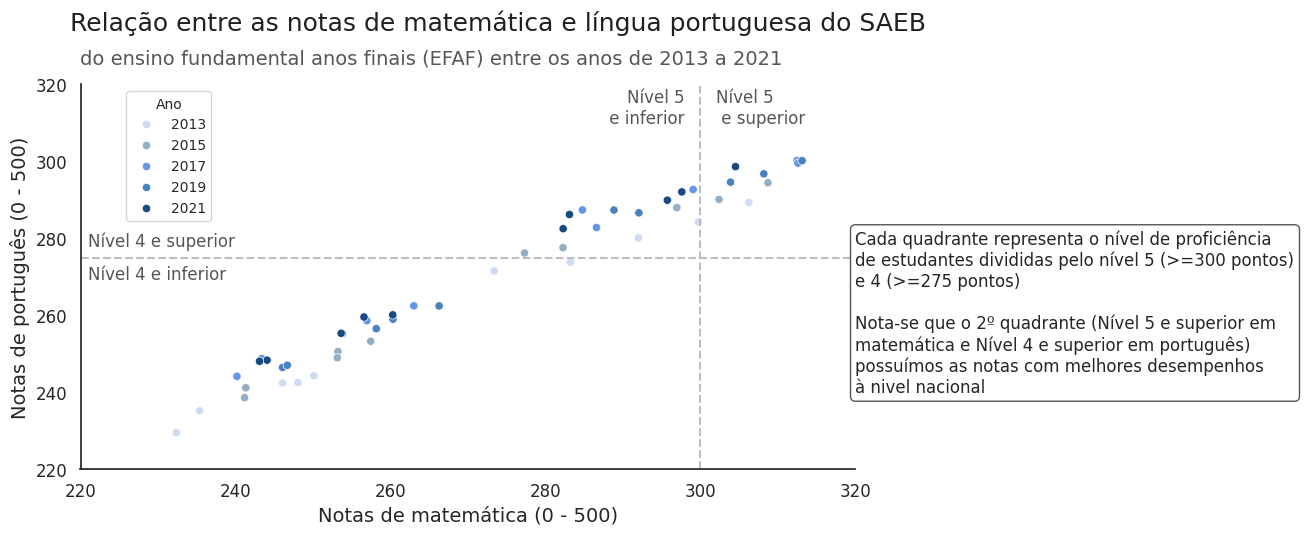

In [17]:
cores = [azul6, azul5, azul3, azul2, azul1]

fig, ax = plt.subplots(figsize = (10,5))
sns.set_theme(style = 'white')

ax = sns.scatterplot(data = ideb_efaf, x = 'nota_saeb_matematica', y = 'nota_saeb_lingua_portuguesa', hue = 'ano', palette = cores)

plt.suptitle('Relação entre as notas de matemática e língua portuguesa do SAEB', size = 18, color = cinza1, ha = 'right', x = 0.97, y = 1.03)
plt.title('do ensino fundamental anos finais (EFAF) entre os anos de 2013 a 2021', fontsize = 14, color = cinza3, pad = 15, loc = 'left')
ax.legend(bbox_to_anchor = (225, 320), title = 'Ano', title_fontsize = 10, fontsize = 10, loc = 'upper left', bbox_transform = ax.transData)
ax.set_xlabel('Notas de matemática (0 - 500)', fontsize = 14)
ax.set_ylabel('Notas de português (0 - 500)', fontsize = 14)
ax.xaxis.set_tick_params(labelsize = 12, color = cinza2)
ax.set_xlim(220, 320)
ax.yaxis.set_tick_params(labelsize = 12, color = cinza2)
ax.set_ylim(220, 320)
sns.despine()

#limite notas
ax.text(ax.get_xlim()[0] + 1, 277, 'Nível 4 e superior', fontsize = 12, color = cinza3, va = 'bottom')
ax.text(ax.get_xlim()[0] + 1, 273, 'Nível 4 e inferior', fontsize = 12, color = cinza3, va = 'top')
plt.axhline(y = 275, color = cinza5, linestyle = '--')

ax.text(298, ax.get_ylim()[1] - 10, 'Nível 5\n e inferior', fontsize =12, color = cinza3, ha = 'right')
ax.text(302, ax.get_ylim()[1] - 10, 'Nível 5\n e superior', fontsize =12, color = cinza3, ha = 'left')
plt.axvline(x = 300, color = cinza5, linestyle = '--')

ax.annotate("Cada quadrante representa o nível de proficiência\nde estudantes divididas pelo nível 5 (>=300 pontos)\ne 4 (>=275 pontos)\n\n"
            "Nota-se que o 2º quadrante (Nível 5 e superior em \nmatemática e Nível 4 e superior em português)\n"
            "possuímos as notas com melhores desempenhos \nà nivel nacional", xy=(320, 240), xycoords='data',
            bbox=dict(boxstyle="round", fc=branco, ec=cinza3),
            xytext=(0, 0), textcoords='offset points')

plt.show()

Qual seria a relação entre as notas do SAEB no Ensino Médio? Conseguimos notar como as duas se comportam em relação a taxa de aprovação e as regiões?

In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
ideb_em = pd.read_csv("https://raw.githubusercontent.com/afonsosr2/dataviz-graficos-composicao-relacionamento/master/dados/ideb_reg_2005_2021.csv")

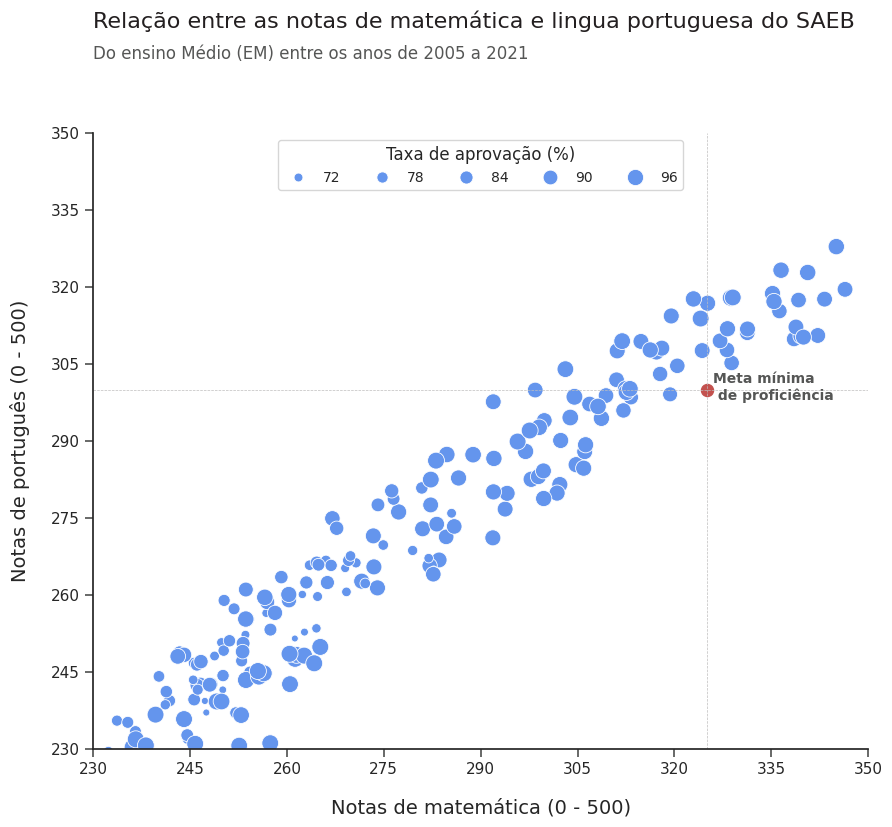

In [25]:
fig, ax = plt.subplots(figsize = (10,8))

ax = sns.scatterplot(data = ideb_em, x = 'nota_saeb_matematica', y = 'nota_saeb_lingua_portuguesa', size = 'taxa_aprovacao', sizes = (20, 150), color = azul3)

ax.scatter([325], [300], color = vermelho1, s = 75)
plt.axvline(x = 325, color = cinza5, linestyle = '--', linewidth = 0.5)
plt.axhline(y = 300, color = cinza5, linestyle = '--', linewidth = 0.5)
ax.text(326, 298, 'Meta mínima\n de proficiência', color = cinza3, fontsize = 10, fontweight = 'bold')

plt.suptitle('Relação entre as notas de matemática e lingua portuguesa do SAEB', size = 16, color = cinza1, ha = 'left', x = 0, y = 1.2, transform = ax.transAxes)
plt.title('Do ensino Médio (EM) entre os anos de 2005 a 2021', fontsize = 12, color = cinza3, ha = 'left', x = 0, y = 1.12, transform = ax.transAxes)
ax.legend(loc = 'upper center', fontsize = 10, title = 'Taxa de aprovação (%)', ncols = 5, bbox_transform = ax.transData)
sns.despine()

ax.set_xlim(230, 350)
ax.set_ylim(230, 350)

plt.setp(ax, xticks = np.arange(230, 351, 15), yticks = np.arange(230, 351, 15))

ax.tick_params(bottom = True, left = True)
ax.xaxis.set_tick_params(labelsize = 11, color = cinza3)
ax.yaxis.set_tick_params(labelsize = 11, color = cinza3)
ax.set_xlabel('Notas de matemática (0 - 500)', fontsize = 14, labelpad = 15)
ax.set_ylabel('Notas de português (0 - 500)', fontsize = 14, labelpad = 15)

plt.show()